In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from matplotlib.image import imread
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import pathlib
import glob
from tqdm.notebook import trange, tqdm
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline

In [2]:
data_dir = "C:\\Users\\asing\\OneDrive\\Desktop\\Jupyter Notebook\\Udemy\\TF_2_Notebooks_and_Data - Copy\\04-CNNs\\car"

In [3]:
os.listdir(data_dir)

['data.yaml',
 'README.dataset.txt',
 'README.roboflow.txt',
 'test',
 'train',
 'valid']

In [4]:
# Make vars for paths for convenience
test_path = data_dir + "\\test"
train_path = data_dir + "\\train"
valid_path = data_dir + "\\valid"

In [5]:
os.listdir(train_path)

['images', 'labels']

In [6]:
# Check dimensionality of each image
width = []
height = []

for folder in os.listdir(test_path):
    
    for image in os.listdir(test_path+'\\images'):
        
        img = imread(test_path+'\\images\\'+image)
        d1, d2, colors = img.shape
        if colors != 3:
            print(colors)
        width.append(d1)
        height.append(d2)

<Axes: >

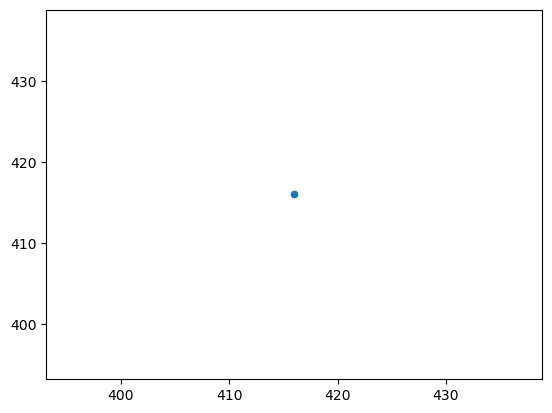

In [ ]:
sns.scatterplot(x=width, y=height)

# ALL IMAGES ARE THE SAME WIDTH/HEIGHT, POGGGGG

In [8]:
image_shape = (width[0], height[0], 3) # Set the shape of each image, 3 for the rgb color channels

In [9]:
from ultralytics import YOLO

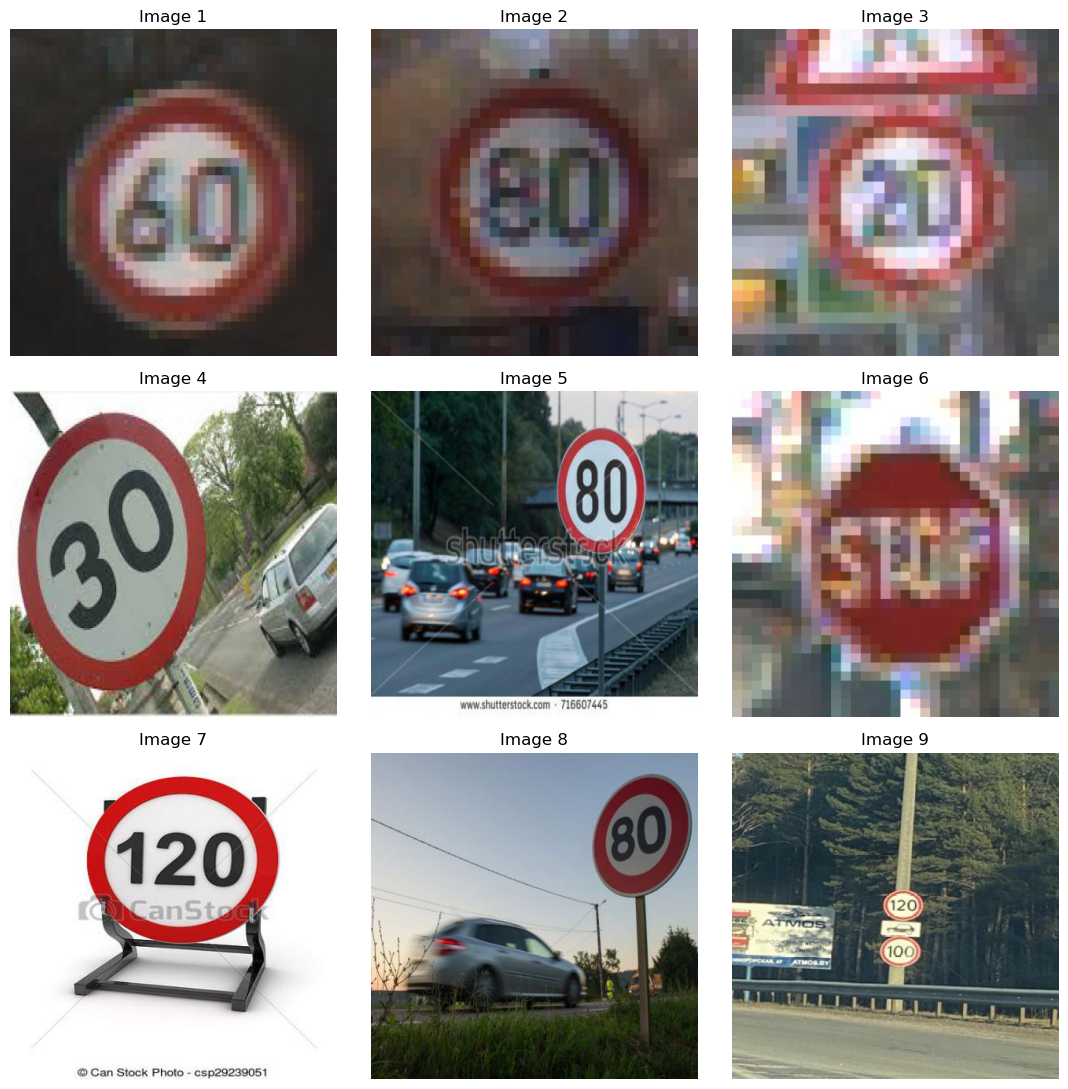

In [10]:
num_samples = 9
image_files = os.listdir(train_path+"//images")

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(train_path+"//images", image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')
Image_dir = train_path + '\\images'

In [12]:
os.listdir(Image_dir)

['000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg',
 '000005_jpg.rf.d730849ae93a7c211a7c8f57ed851028.jpg',
 '000007_jpg.rf.226fe0751cf8ba445b8f87970e70f606.jpg',
 '000008_jpg.rf.bd6ae6db0f8c0eb727706bc322ce21ae.jpg',
 '000009_jpg.rf.df4118d1d26fa7a25923521216cc2f64.jpg',
 '00000_00000_00000_png.rf.55d47572c5980af0892b0c2ada6dae77.jpg',
 '00000_00000_00000_png.rf.eb9b5799307ebcf07dd4c95eac0e6d13.jpg',
 '00000_00000_00001_png.rf.56c1f101f790944f14f215c7cad2a2b8.jpg',
 '00000_00000_00001_png.rf.8bc8cc5e727cfd7e81b5184a15dd6fc1.jpg',
 '00000_00000_00002_png.rf.c8ad86390583e313b909403180f01ffd.jpg',
 '00000_00000_00004_png.rf.8737f80bd4f1455970179b3df433fba5.jpg',
 '00000_00000_00004_png.rf.aca6f66c5ac9e8f41d9ed188ecff427d.jpg',
 '00000_00000_00005_png.rf.998f471ba534c1f2ccafdafcd63c12a4.jpg',
 '00000_00000_00006_png.rf.80574bc0c6d4cc6f5e2f151110a5e7a1.jpg',
 '00000_00000_00007_png.rf.a57de5d1a4e7ac7afa168838fec08c3a.jpg',
 '00000_00000_00007_png.rf.e65cb79547cb26225e34cf96c75390f9.jpg',


image 1/1 C:\Users\asing\OneDrive\Desktop\Jupyter Notebook\Udemy\TF_2_Notebooks_and_Data - Copy\04-CNNs\car\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 104.7ms
Speed: 6.0ms preprocess, 104.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


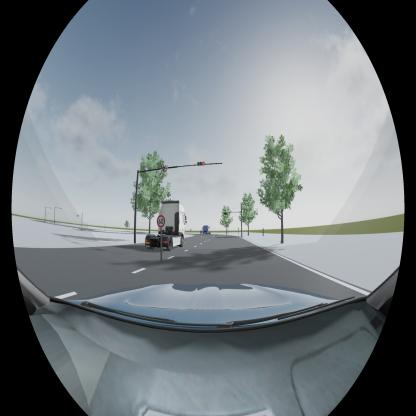

In [14]:
model = YOLO("yolov12m.pt") 

image = Image_dir + "\\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [15]:
!pip install --upgrade ultralytics ray

  Using cached ultralytics-8.3.55-py3-none-any.whl.metadata (35 kB)
  Using cached psutil-6.1.1-cp37-abi3-win_amd64.whl.metadata (23 kB)
  Using cached ultralytics_thop-2.0.13-py3-none-any.whl.metadata (9.4 kB)
Using cached ultralytics-8.3.55-py3-none-any.whl (904 kB)
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
    --------------------------------------- 0.5/25.2 MB 11.4 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/25.2 MB 22.9 MB/s eta 0:00:02
   ----- ---------------------------------- 3.5/25.2 MB 24.8 MB/s eta 0:00:01
   -------- ------------------------------- 5.1/25.2 MB 27.2 MB/s eta 0:00:01
   ---------- ----------------------------- 6.5/25.2 MB 29.6 MB/s eta 0:00:01
   ------------ --------------------------- 7.9/25.2 MB 28.0 MB/s eta 0:00:01
   -------------- ------------------------- 9.3/25.2 MB 28.2 MB/s eta 0:00:01
   ---------------- ----------------------- 10.3/25.2 MB 29.7 MB/s eta 0:00:01
   ------------------ --------------

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\ultralytics.exe' -> 'C:\\Python311\\Scripts\\ultralytics.exe.deleteme'



In [17]:
os.listdir(data_dir)

['data.yaml',
 'README.dataset.txt',
 'README.roboflow.txt',
 'test',
 'train',
 'valid']

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov12m.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data=data_dir+"\\data.yaml",epochs = 30, batch = -1, optimizer = 'auto', device = 0) 

New https://pypi.org/project/ultralytics/8.3.56 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.55  Python-3.10.9 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\asing\OneDrive\Desktop\Jupyter Notebook\Udemy\TF_2_Notebooks_and_Data - Copy\04-CNNs\car\data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=

train: Scanning C:\Users\asing\OneDrive\Desktop\Jupyter Notebook\Udemy\TF_2_Notebooks_and_Data - Copy\04-CNNs\car\train

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch:   intended for CUDA devices, using default batch-size 16



train: Scanning C:\Users\asing\OneDrive\Desktop\Jupyter Notebook\Udemy\TF_2_Notebooks_and_Data - Copy\04-CNNs\car\train
val: Scanning C:\Users\asing\OneDrive\Desktop\Jupyter Notebook\Udemy\TF_2_Notebooks_and_Data - Copy\04-CNNs\car\valid\l

Plotting labels to C:\Users\asing\runs\detect\train3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\asing\runs\detect\train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G     0.8501      3.432      1.185         21        640: 100%|██████████| 221/221 [12:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:13

                   all        801        944      0.171      0.525      0.236      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G     0.7687      2.546       1.11         16        640: 100%|██████████| 221/221 [12:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:10

                   all        801        944      0.312       0.56      0.368      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G     0.7505      2.183      1.085         31        640: 100%|██████████| 221/221 [12:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07

                   all        801        944      0.424      0.569      0.464       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G     0.7298      1.854      1.074         17        640: 100%|██████████| 221/221 [12:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:06

                   all        801        944      0.646      0.566      0.641       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G     0.7073      1.595      1.057         29        640: 100%|██████████| 221/221 [12:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:12

                   all        801        944      0.643      0.665      0.714      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G     0.6947      1.416      1.052         17        640: 100%|██████████| 221/221 [12:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07

                   all        801        944      0.759      0.721      0.794      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.6673      1.279       1.04         22        640: 100%|██████████| 221/221 [12:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09

                   all        801        944      0.783      0.753       0.82      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.6527      1.186      1.022         25        640: 100%|██████████| 221/221 [12:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08

                   all        801        944      0.792      0.782       0.84      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      0.634      1.092      1.013         21        640: 100%|██████████| 221/221 [12:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08

                   all        801        944      0.879      0.755      0.842      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.6463      1.056      1.021         19        640: 100%|██████████| 221/221 [12:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09

                   all        801        944       0.91      0.782       0.88      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.6397     0.9913      1.015         20        640: 100%|██████████| 221/221 [12:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09

                   all        801        944      0.923      0.813        0.9      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.6223     0.9473      1.002         23        640: 100%|██████████| 221/221 [12:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09

                   all        801        944      0.921        0.8      0.889      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      0.613     0.9116          1         15        640: 100%|██████████| 221/221 [12:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08

                   all        801        944      0.879      0.829      0.902      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.6031      0.878     0.9917         19        640: 100%|██████████| 221/221 [12:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09

                   all        801        944      0.904      0.843       0.91      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.5964     0.8466     0.9978         24        640: 100%|██████████| 221/221 [12:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:06

                   all        801        944      0.923      0.845      0.915      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.5973     0.8213     0.9907         29        640: 100%|██████████| 221/221 [12:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08

                   all        801        944      0.955      0.825      0.921      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.5779     0.7955     0.9878         14        640: 100%|██████████| 221/221 [12:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:06

                   all        801        944      0.945      0.845      0.927       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.5719     0.7698     0.9789         17        640: 100%|██████████| 221/221 [12:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:06

                   all        801        944      0.951      0.842       0.93       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.5794     0.7619       0.98         20        640: 100%|██████████| 221/221 [12:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08

                   all        801        944      0.957      0.846      0.935      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.5725     0.7369     0.9773         20        640: 100%|██████████| 221/221 [12:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:06

                   all        801        944      0.927      0.874      0.936      0.796


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.5616     0.5318     0.9548         14        640: 100%|██████████| 221/221 [12:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07

                   all        801        944      0.934      0.876       0.94        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.5597     0.4933      0.943         13        640: 100%|██████████| 221/221 [12:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09

                   all        801        944       0.94      0.891      0.951      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.5405     0.4785     0.9365         15        640: 100%|██████████| 221/221 [12:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:06

                   all        801        944      0.947      0.879      0.947      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.5417      0.458     0.9323         10        640: 100%|██████████| 221/221 [12:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07

                   all        801        944      0.933      0.883      0.947      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.5341     0.4461      0.927         14        640: 100%|██████████| 221/221 [12:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:06

                   all        801        944      0.947      0.895      0.954      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.5234      0.426     0.9259         10        640: 100%|██████████| 221/221 [12:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09

                   all        801        944      0.955      0.889      0.955      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.5232     0.4123     0.9192         18        640: 100%|██████████| 221/221 [11:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07

                   all        801        944      0.959      0.888      0.957      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.5115     0.4058      0.916         14        640: 100%|██████████| 221/221 [11:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09

                   all        801        944      0.962      0.888      0.958      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.5067     0.3929     0.9182         10        640: 100%|██████████| 221/221 [11:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08

                   all        801        944      0.965      0.891      0.959      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.5002     0.3832     0.9086         11        640: 100%|██████████| 221/221 [11:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08

                   all        801        944      0.961      0.887      0.958      0.833



30 epochs completed in 6.664 hours.
Optimizer stripped from C:\Users\asing\runs\detect\train3\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\asing\runs\detect\train3\weights\best.pt, 6.3MB

Validating C:\Users\asing\runs\detect\train3\weights\best.pt...
Ultralytics 8.3.55  Python-3.10.9 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:58


                   all        801        944      0.963      0.893      0.959      0.835
           Green Light         87        122      0.864      0.639      0.834      0.507
             Red Light         74        108       0.91      0.655      0.829      0.516
       Speed Limit 100         52         52      0.953      0.962      0.986      0.901
       Speed Limit 110         17         17          1      0.998      0.995      0.928
       Speed Limit 120         60         60      0.989      0.933      0.992      0.919
        Speed Limit 20         56         56      0.996      0.982      0.986      0.877
        Speed Limit 30         71         74          1      0.959      0.987      0.938
        Speed Limit 40         53         55      0.945      0.945      0.984      0.878
        Speed Limit 50         68         71      0.984      0.885      0.967      0.874
        Speed Limit 60         76         76      0.968      0.908      0.964      0.884
        Speed Limit 7

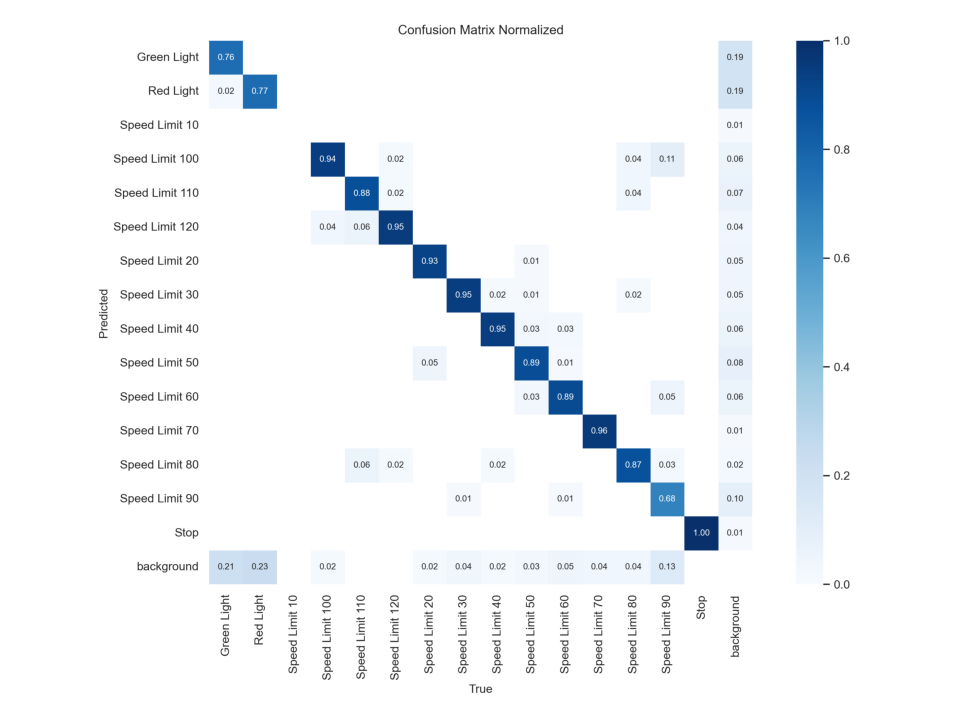

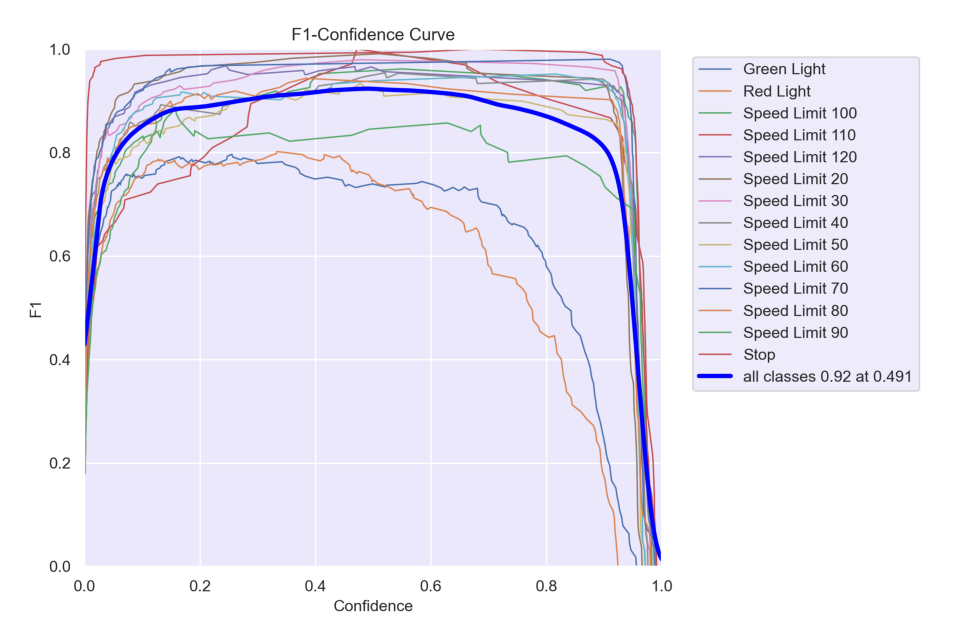

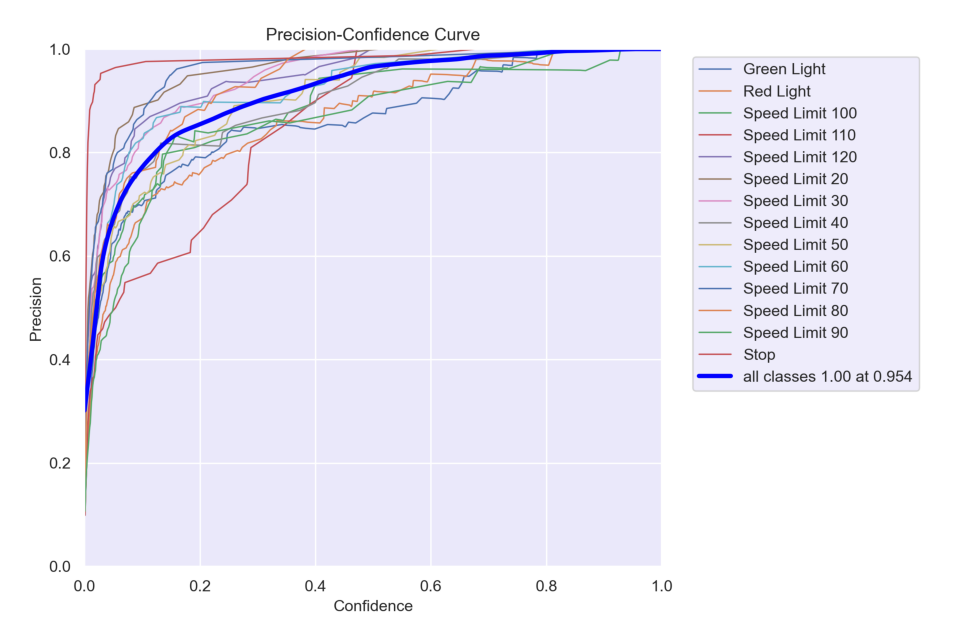

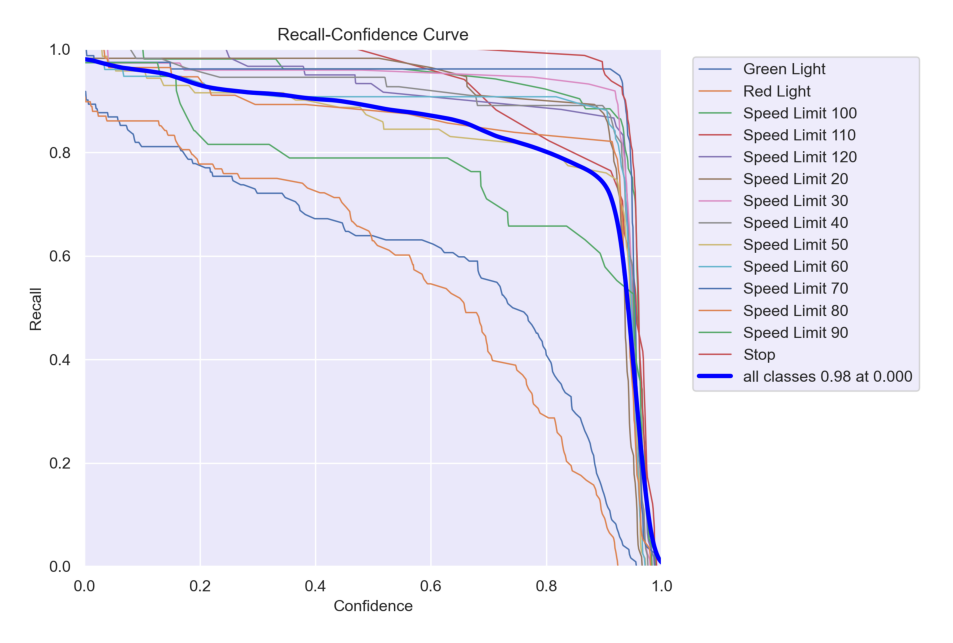

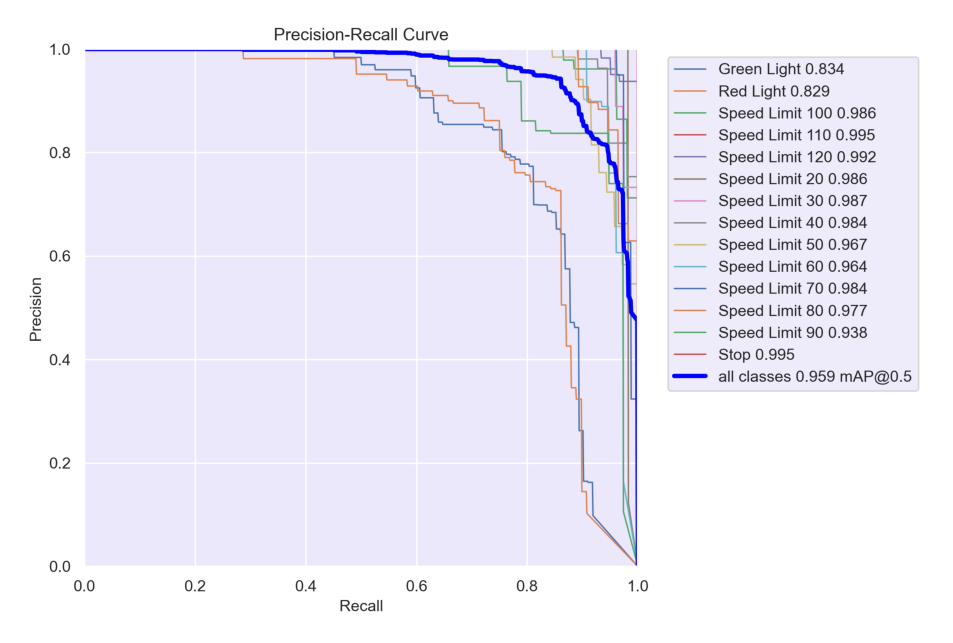

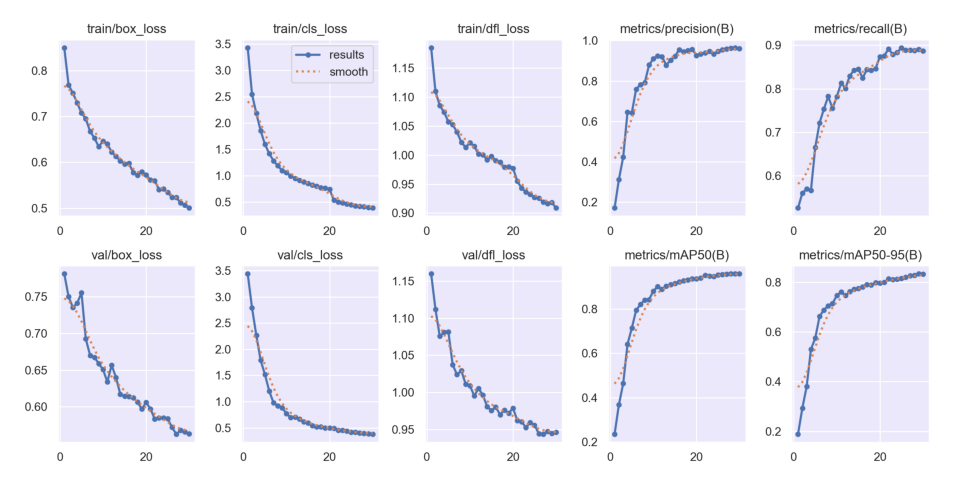

In [27]:
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'C:\\Users\\asing\\runs\\detect\\train3'

# Display the images
display_images(post_training_files_path, image_files)

In [29]:
Valid_model = YOLO('C:\\Users\\asing\\runs\\detect\\train3\\weights\\best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.55  Python-3.10.9 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\asing\OneDrive\Desktop\Jupyter Notebook\Udemy\TF_2_Notebooks_and_Data - Copy\04-CNNs\car\valid\l
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:57


                   all        801        944      0.963      0.893      0.959      0.835
           Green Light         87        122      0.864      0.639      0.834      0.507
             Red Light         74        108       0.91      0.655      0.829      0.516
       Speed Limit 100         52         52      0.953      0.962      0.986      0.901
       Speed Limit 110         17         17          1      0.998      0.995      0.928
       Speed Limit 120         60         60      0.989      0.933      0.992      0.919
        Speed Limit 20         56         56      0.996      0.982      0.986      0.877
        Speed Limit 30         71         74          1      0.959      0.987      0.938
        Speed Limit 40         53         55      0.945      0.945      0.984      0.878
        Speed Limit 50         68         71      0.984      0.885      0.967      0.874
        Speed Limit 60         76         76      0.968      0.908      0.964      0.884
        Speed Limit 7

In [30]:
Valid_model.export(format='onnx')

Ultralytics 8.3.55  Python-3.10.9 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)

PyTorch: starting from 'C:\Users\asing\runs\detect\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
Retry 1/2 failed: Command 'pip install --no-cache-dir "onnx>=1.12.0" "onnxslim" "onnxruntime" ' returned non-zero exit status 1.
Retry 2/2 failed: Command 'pip install --no-cache-dir "onnx>=1.12.0" "onnxslim" "onnxruntime" ' returned non-zero exit status 1.
requirements:  Command 'pip install --no-cache-dir "onnx>=1.12.0" "onnxslim" "onnxruntime" ' returned non-zero exit status 1.
ONNX: export failure  8.8s: No module named 'onnx'


ModuleNotFoundError: No module named 'onnx'

In [31]:
!pip install onnx

In [33]:
Valid_model.export(format='onnx')

Ultralytics 8.3.55  Python-3.10.9 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)

PyTorch: starting from 'C:\Users\asing\runs\detect\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  1.4s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements:  Restart runtime or rerun command for updates to take effect

ONNX: export failure  1.4s: No module named 'onnx'


ModuleNotFoundError: No module named 'onnx'